In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import pairwise
import os 

os.chdir("/u/venia")

df = pd.read_csv("reddit_methods/data/url_sample.csv")

metadata=pd.read_table('data/reddit-master-metadata.tsv')
vectors=pd.read_table("data/reddit-master-vectors.tsv",names=list(range(150)))
metadata=metadata['community']
data=pd.merge(metadata,vectors,left_index=True,right_index=True)

In [2]:
comp_sub = df.groupby(['domain','subreddit'])['id'].count().reset_index()
comp_counts = df.groupby('domain')['id'].count().reset_index()

comp_sub = pd.merge(comp_sub, data, left_on='subreddit', right_on='community')
comp_sub['count'] = comp_sub['id']
comp_sub.drop(['community','id'], axis=1,inplace=True)
comp_sub_count = pd.merge(comp_sub, comp_counts, on = 'domain')

for i in range(150):
    comp_sub_count[i] = comp_sub_count[i] * comp_sub_count['count'] / comp_sub_count['id']
    
company_embedding = comp_sub_count.groupby('domain')[np.arange(150)].sum()

temp  =company_embedding[company_embedding.index.isin(df.groupby('domain')['id'].count().sort_values(ascending=False).head(50).index)]

company_embedding['sum'] = (company_embedding[np.arange(150)] * company_embedding[np.arange(150)]).sum(axis=1) ** .5

for i in range(150):
    company_embedding[i] = company_embedding[i] / company_embedding['sum']
company_embedding.drop('sum',axis=1,inplace=True)

In [5]:
company_embedding['sum'] = (company_embedding[np.arange(150)] * company_embedding[np.arange(150)]).sum(axis=1) ** .5

for i in range(150):
    company_embedding[i] = company_embedding[i] / company_embedding['sum']
company_embedding.drop('sum',axis=1,inplace=True)

In [9]:
# company_embedding.to_csv("reddit_methods/data/wikipedia_vecs.csv")

In [6]:
company_embedding.to_csv("reddit_methods/data/domain_vecs.tsv", index = False, sep='\t', header = False)
pd.DataFrame(company_embedding.index).to_csv("reddit_methods/data/domain_metadata.tsv", index=True, sep='\t')

In [8]:
company_embedding

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
domain,,,,,,,,,,,,,,,,,,,,,
.cbn.com,0.056756,-0.006877,-0.080271,0.041155,-0.002554,-0.048240,-0.071961,0.200052,-0.050140,0.068142,...,-0.011050,0.018644,0.081729,-0.087692,0.166686,-0.001993,-0.012572,0.007613,-0.169452,0.036840
.folha.uol.com,0.043068,-0.048922,-0.091188,0.068924,0.039156,0.033413,0.130095,0.137215,-0.040253,-0.055386,...,0.128735,-0.049047,0.000700,-0.141098,0.038577,-0.009028,-0.079949,0.057330,-0.032552,-0.101981
1000bulbs.com,-0.034110,-0.048298,-0.085498,0.066159,0.036814,-0.039208,-0.007035,0.111490,-0.017514,-0.027358,...,-0.057388,0.121473,0.080041,-0.107537,0.101148,0.039934,0.025914,0.058864,-0.008659,0.055912
1001fonts.com,0.023862,-0.030053,-0.060906,0.045261,0.061114,-0.010559,0.107414,0.159608,0.011082,0.088389,...,0.121043,0.030418,0.127672,-0.112924,0.081594,-0.019748,0.021698,-0.004054,-0.015226,0.058891
1001tracklists.com,0.063750,-0.001933,-0.130347,0.142799,0.009146,0.070630,0.062854,0.100770,0.032353,-0.018354,...,0.192354,0.106274,0.100012,-0.061110,-0.000817,-0.062462,0.076127,-0.014231,-0.058182,0.111700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zotac.com,0.062567,-0.022237,-0.089191,0.041986,0.028793,0.068717,0.065073,0.158417,0.003546,0.127726,...,-0.029617,0.046238,0.083325,-0.070635,0.077019,-0.074526,-0.063335,0.026903,-0.026480,0.150475
zteusa.com,-0.014469,0.054674,-0.146759,0.014152,0.162277,0.117385,0.101221,0.055392,-0.024017,0.023686,...,0.008553,0.050221,0.010586,-0.107060,0.049286,0.016670,0.058694,0.062607,0.052981,0.067528
zulily.com,-0.045096,0.012785,-0.084212,0.088373,0.120374,-0.004231,-0.104450,0.217905,-0.051864,0.006169,...,0.023669,0.059623,0.058830,-0.122308,0.039127,-0.009068,0.115860,-0.003821,-0.009559,0.073037


In [11]:
from sklearn.metrics import pairwise
cosine_sim=pd.DataFrame(pairwise.cosine_similarity(temp.values),columns=temp.index, index =temp.index)

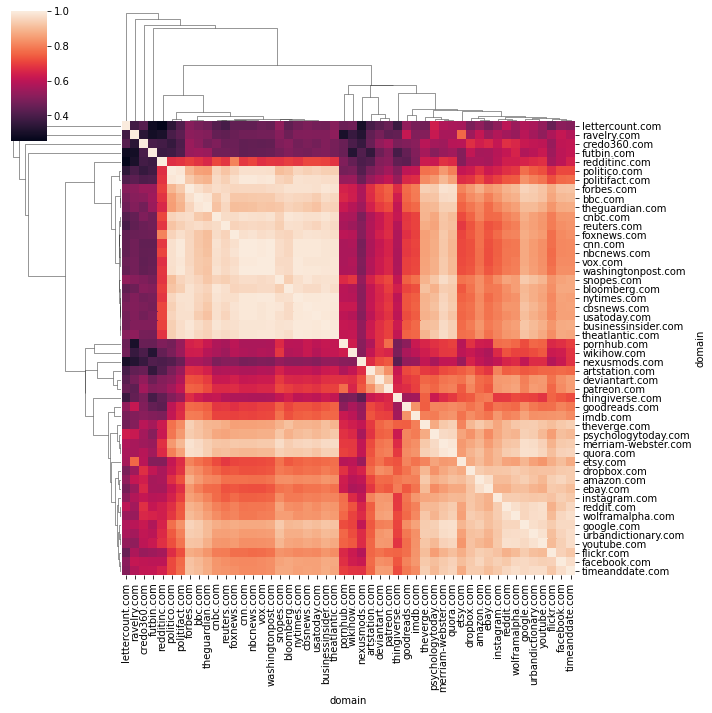

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.clustermap( cosine_sim,
                method='average',
                metric='cosine',
                yticklabels=True, 
                xticklabels=True
              )
plt.savefig("reddit_methods/domains_clustermap", dpi = 300)

In [16]:
from sklearn.cluster import KMeans

km = KMeans(50)
y_pred = km.fit_predict(company_embedding)



In [18]:
temp = pd.merge(company_embedding, df.groupby('domain')['id'].count().sort_values(ascending=False), left_index=True, right_index=True)

In [24]:
temp['cluster'] = y_pred
for i in np.arange(50):
    df_temp = temp[temp['cluster']==i].reset_index()
    print("Cluster {}: Top 10 domains".format(i))
    print(df_temp.groupby("domain")['id'].sum().sort_values(ascending=False).head(10))
    print("")

Cluster 0: Top 10 domains
domain
yelp.com                1562
zillow.com              1060
eventbrite.com           783
herbibot.com             736
bizjournals.com          610
mlive.com                500
kansascity.com           409
monthlybrilliant.com     342
nola.com                 318
post-gazette.com         315
Name: id, dtype: int64

Cluster 1: Top 10 domains
domain
nexusmods.com      11795
polygon.com         2131
ea.com              2059
pcgamer.com         1898
epicgames.com       1646
steamtrades.com     1452
ign.com             1110
mediafire.com       1022
nintendo.com         993
playstation.com      982
Name: id, dtype: int64

Cluster 2: Top 10 domains
domain
smh.com               1758
setopati.com          1377
straitstimes.com       754
onlinekhabar.com       720
nepalitimes.com        695
sbs.com                658
thehindu.com           555
ndtv.com               480
theage.com             430
hindustantimes.com     418
Name: id, dtype: int64

Cluster 3: Top 10 d

domain
discogs.com               2879
monoprice.com              700
parts-express.com          699
crutchfield.com            652
accessories4less.com       511
audiosciencereview.com     338
avsforum.com               268
dolby.com                  147
innerfidelity.com          122
audioholics.com            121
Name: id, dtype: int64

Cluster 45: Top 10 domains
domain
credo360.com        14197
tradingview.com      2092
coindesk.com          541
prnewswire.com        421
xrptipbot.com         416
blockchain.com        341
nasdaq.com            309
sofi.com              267
ccn.com               255
businesswire.com      241
Name: id, dtype: int64

Cluster 46: Top 10 domains
domain
imdb.com                 24960
netflix.com               4837
hollywoodreporter.com     1617
rottentomatoes.com        1110
vulture.com                776
bricklink.com              763
boxofficemojo.com          707
indiewire.com              631
slashfilm.com              478
syfy.com                   4

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,id
domain,,,,,,,,,,,,,,,,,,,,,
.cbn.com,0.056756,-0.006877,-0.080271,0.041155,-0.002554,-0.048240,-0.071961,0.200052,-0.050140,0.068142,...,0.018644,0.081729,-0.087692,0.166686,-0.001993,-0.012572,0.007613,-0.169452,0.036840,38
.folha.uol.com,0.043068,-0.048922,-0.091188,0.068924,0.039156,0.033413,0.130095,0.137215,-0.040253,-0.055386,...,-0.049047,0.000700,-0.141098,0.038577,-0.009028,-0.079949,0.057330,-0.032552,-0.101981,64
1000bulbs.com,-0.034110,-0.048298,-0.085498,0.066159,0.036814,-0.039208,-0.007035,0.111490,-0.017514,-0.027358,...,0.121473,0.080041,-0.107537,0.101148,0.039934,0.025914,0.058864,-0.008659,0.055912,40
1001fonts.com,0.023862,-0.030053,-0.060906,0.045261,0.061114,-0.010559,0.107414,0.159608,0.011082,0.088389,...,0.030418,0.127672,-0.112924,0.081594,-0.019748,0.021698,-0.004054,-0.015226,0.058891,53
1001tracklists.com,0.063750,-0.001933,-0.130347,0.142799,0.009146,0.070630,0.062854,0.100770,0.032353,-0.018354,...,0.106274,0.100012,-0.061110,-0.000817,-0.062462,0.076127,-0.014231,-0.058182,0.111700,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zotac.com,0.062567,-0.022237,-0.089191,0.041986,0.028793,0.068717,0.065073,0.158417,0.003546,0.127726,...,0.046238,0.083325,-0.070635,0.077019,-0.074526,-0.063335,0.026903,-0.026480,0.150475,73
zteusa.com,-0.014469,0.054674,-0.146759,0.014152,0.162277,0.117385,0.101221,0.055392,-0.024017,0.023686,...,0.050221,0.010586,-0.107060,0.049286,0.016670,0.058694,0.062607,0.052981,0.067528,21
zulily.com,-0.045096,0.012785,-0.084212,0.088373,0.120374,-0.004231,-0.104450,0.217905,-0.051864,0.006169,...,0.059623,0.058830,-0.122308,0.039127,-0.009068,0.115860,-0.003821,-0.009559,0.073037,44
